### パラメータ推定 s1 only

In [1]:
# maskの方の関数を使う

In [3]:
include("../../src/function/masked_main_function.jl");

In [4]:
using NPZ

cov_mat_scal = npzread("../../covariance_matrix/masked_cov_mat_scal.npy")
cov_mat_tens = npzread("../../covariance_matrix/masked_cov_mat_tens.npy");

### パラメータセット

In [4]:
nside = 4
r =0.;

In [5]:
# litebirdの周波数を選んで
# 色々なバンドで試す

freq_band_case1 = [40, 68, 100]
freq_band_case2 = [40, 50, 100]
which_model = "s1"
cmb_freq = 100;

In [6]:
# スレッドセーフな計算 push!は使うな

times = 1000

r_array_case1 = zeros(times)
r_array_case2 = zeros(times)

beta_array_case1 = zeros(times)
beta_array_case2 = zeros(times)

accuracy_r, accuracy_like = 1e-5, 1e-2

@time @inbounds @threads for seed in 1:times

    # r_like_estimate_fast(r_ini, num_iterations, random_seed_cmb, seed_syn, nside, r_input, freq_band, which_model, cmb_freq, cov_mat_scal, cov_mat_tens)
    r_array, beta_array, optimum_r1, optimum_beta_s1 = r_like_estimate_fast(0.001, 100, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case1, which_model, cmb_freq, cov_mat_scal, cov_mat_tens);
    r_array, beta_array, optimum_r2, optimum_beta_s2 = r_like_estimate_fast(0.001, 100, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case2, which_model, cmb_freq, cov_mat_scal, cov_mat_tens);

    # case1 [40, 68, 100]
    r_array_case1[seed] = optimum_r1
    beta_array_case1[seed] = optimum_beta_s1

    # case2 [40, 50, 100]
    r_array_case2[seed] = optimum_r2
    beta_array_case2[seed] = optimum_beta_s2
    
    #print(seed)

end

618.045986 seconds (268.74 M allocations: 830.796 GiB, 2.25% gc time, 1.67% compilation time: <1% of which was recompilation)


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


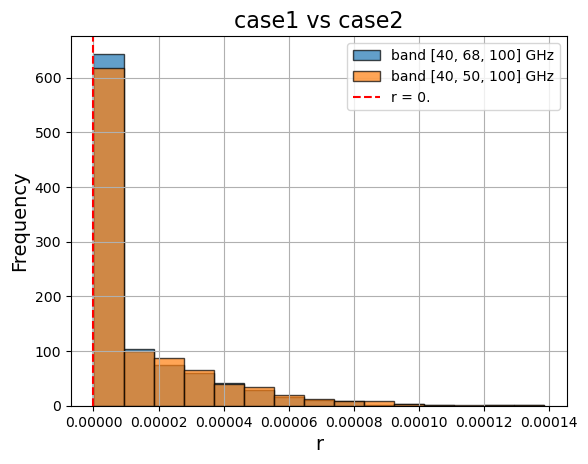

In [7]:
using PyPlot 

# histogram
hist(r_array_case1, bins = 15, alpha = 0.7, edgecolor = "black", label = "band [40, 68, 100] GHz")
hist(r_array_case2, bins = 15, alpha = 0.7, edgecolor = "black", label = "band [40, 50, 100] GHz")

# r = 0.01
PyPlot.axvline(x = 0., color = "red", linestyle = "--", label = "r = 0.")

title("case1 vs case2", fontsize = 16)
xlabel("r", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

In [8]:
std(r_array_case1) * 1.96
std(r_array_case2) * 1.96

4.160213696896038e-5

In [9]:
# 68%CL Δr
println("Δr_case1 =", std(r_array_case1))
println("Δr_case2 =", std(r_array_case2))

Δr_case1 =1.9832148784756545e-5
Δr_case2 =2.122558008620428e-5


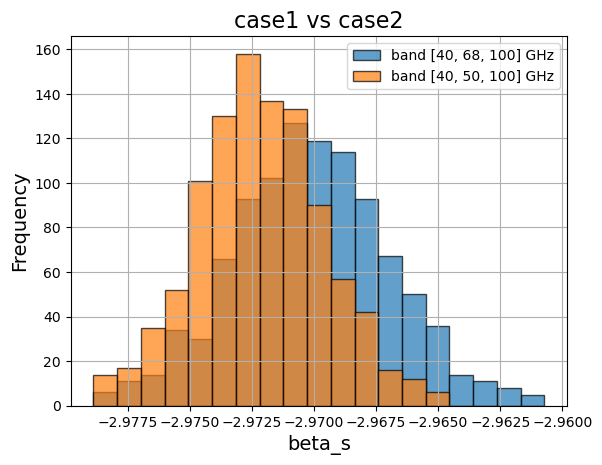

In [10]:
using PyPlot 

min_range = minimum([beta_array_case1; beta_array_case2])
max_range = maximum([beta_array_case1; beta_array_case2])
bins = range(min_range, stop = max_range, length=20)

# histogram
hist(beta_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = "band [40, 68, 100] GHz")
hist(beta_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = "band [40, 50, 100] GHz")

title("case1 vs case2", fontsize = 16)
xlabel("beta_s", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

In [11]:
println("case1 r = ", mean(r_array_case1))
println("case2 r = ", mean(r_array_case2))

case1 r = 1.238226602866733e-5
case2 r = 1.3895395874156827e-5


In [12]:
println("case1 beta = ", mean(beta_array_case1))
println("case2 beta = ", mean(beta_array_case2))

case1 beta = -2.970102156374618
case2 beta = -2.9721450552879385
